In [8]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


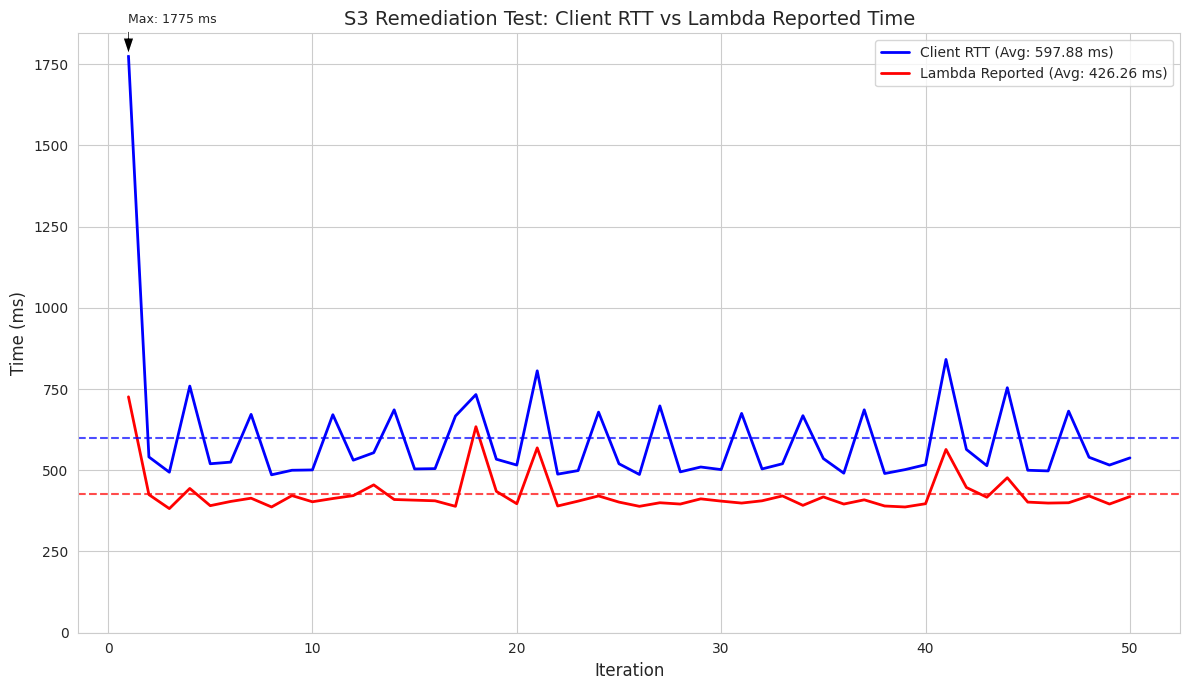

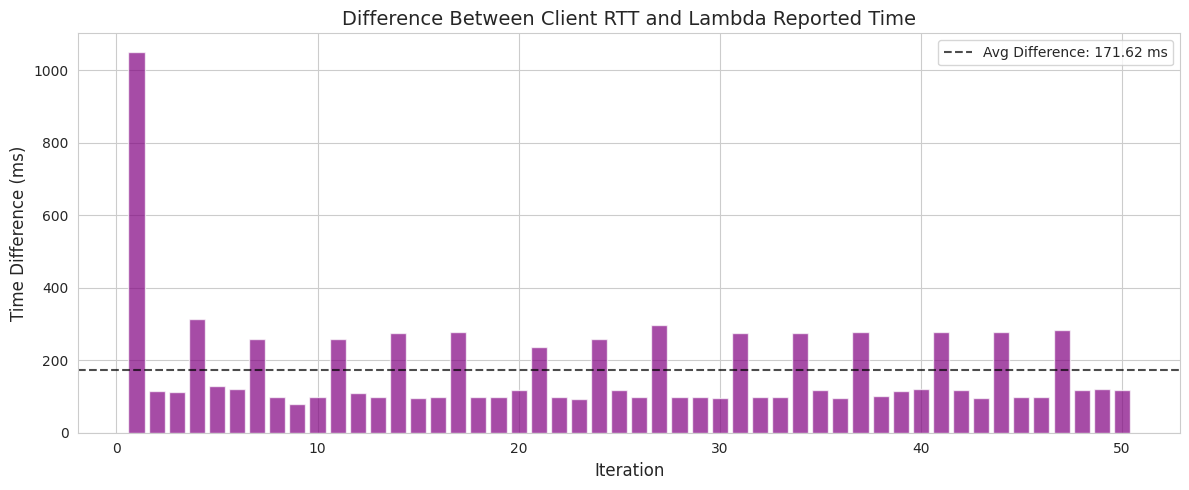

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Load the CSV data
# Replace 's3_remediation_data.csv' with your actual file path if different
data = pd.read_csv('/content/drive/MyDrive/test_log.csv')

# Calculate averages
client_avg = data['Client_RTT_ms'].mean()
lambda_avg = data['Lambda_Reported_ms'].mean()

# Create the first plot - Line graph comparing Client RTT and Lambda reported times
plt.figure(figsize=(12, 7))
plt.plot(data['Iteration'], data['Client_RTT_ms'], 'b-', label=f'Client RTT (Avg: {client_avg:.2f} ms)', linewidth=2)
plt.plot(data['Iteration'], data['Lambda_Reported_ms'], 'r-', label=f'Lambda Reported (Avg: {lambda_avg:.2f} ms)', linewidth=2)

# Add horizontal lines for averages
plt.axhline(y=client_avg, color='b', linestyle='--', alpha=0.7)
plt.axhline(y=lambda_avg, color='r', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Time (ms)', fontsize=12)
plt.title('S3 Remediation Test: Client RTT vs Lambda Reported Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

# Set y-axis range to make visualization better
plt.ylim(bottom=0)

# Add annotations for notable points
max_client = data['Client_RTT_ms'].max()
max_client_idx = data['Client_RTT_ms'].idxmax() + 1
plt.annotate(f'Max: {max_client} ms',
             xy=(data.loc[max_client_idx-1, 'Iteration'], max_client),
             xytext=(data.loc[max_client_idx-1, 'Iteration'], max_client+100),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
             fontsize=9)

# Save the figure (optional)
# plt.savefig('s3_remediation_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()

# Create a second plot showing the difference between client and lambda times
plt.figure(figsize=(12, 5))
data['Difference_ms'] = data['Client_RTT_ms'] - data['Lambda_Reported_ms']
diff_avg = data['Difference_ms'].mean()

plt.bar(data['Iteration'], data['Difference_ms'], color='purple', alpha=0.7)
plt.axhline(y=diff_avg, color='k', linestyle='--', alpha=0.7,
            label=f'Avg Difference: {diff_avg:.2f} ms')

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Time Difference (ms)', fontsize=12)
plt.title('Difference Between Client RTT and Lambda Reported Time', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, axis='y')

# Save the second figure (optional)
# plt.savefig('s3_remediation_difference_plot.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()